In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

In [2]:
def metrique(path):
    files = os.listdir(path);
    contenu = [];
    for file in files:
        if file.endswith('.json'):
            openFile = open(path+file, "r");
            contenu.append(json.loads(openFile.read())["Image"]);
            openFile.close();
    return contenu;

In [3]:
chemin = os.getcwd()+"/train/";
contenu = [];
if not os.path.isdir(chemin):
    print('Rajouter le dossier train dans le dossier courant :) ! ');
else :
    contenu = metrique(chemin);

# Utilisation de pandas pour faire de la métrique.

Création du dataframe en fonction des json.

In [4]:
df = pd.DataFrame(contenu)
df.drop(["Date","Author","Content","MediaId", "LearnTag", "ImageId2014","ObservationId2014","YearInCLEF","ObservationId"], axis='columns', inplace=True)
df.sample(10)

,Vote,ClassId,Family,Genus,Species,Location,Latitude,Longitude
305,3,6547,Orchidaceae,Orchis,Orchis purpurea Huds.,Saint-Jurs,43.89829,6.19701
2330,3,967,Asteraceae,Hypochaeris,Hypochaeris radicata L.,Sainte-Geneviève-des-Bois,48.64647,2.3178
1740,3,5148,Salicaceae,Salix,Salix caprea L.,Sainte-Geneviève-des-Bois,48.8567,2.24104
2795,4,4369,Primulaceae,Primula,Primula veris L.,None,None,None
1409,4,6538,Orchidaceae,Anacamptis,"Anacamptis morio (L.) R.M.Bateman, Pridgeon & ...",Bouzic,44.70283,1.20309
1312,3.5,151,Apiaceae,Daucus,Daucus carota L.,Meyzieu,45.77615,5.00521
3386,3,565,Asteraceae,Centaurea,Centaurea aspera L.,Gruissan,None,None
2512,4,6547,Orchidaceae,Orchis,Orchis purpurea Huds.,Saint-Jurs,43.89829,6.19701
563,4,493,Asteraceae,Bellis,Bellis perennis L.,None,None,None
836,5,4369,Primulaceae,Primula,Primula veris L.,Vienne,48.84187,2.22709


Savoir le nombre de classe différente.

In [5]:
df['ClassId'].nunique()

50

Répartition des classes.

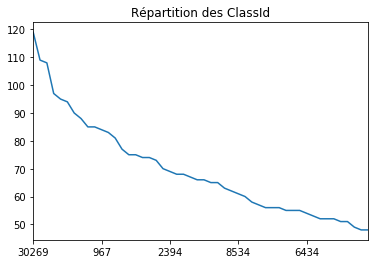

In [6]:
df['ClassId'].value_counts().plot(kind='line', sharex=False, title='Répartition des ClassId')
plt.show()

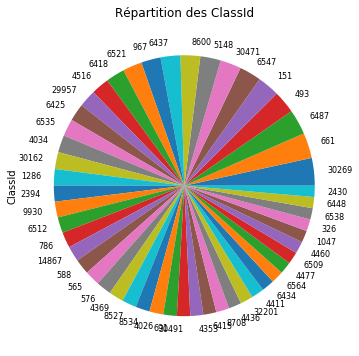

In [7]:
df['ClassId'].value_counts().plot(kind='pie',figsize=(6,6),title='Répartition des ClassId',fontsize=8,legend=False)
plt.show()

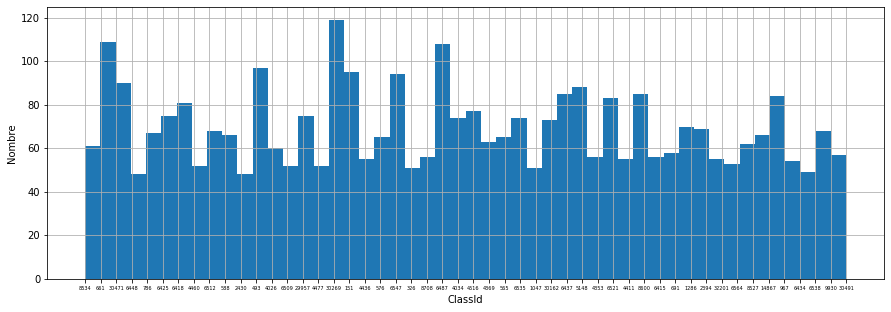

In [8]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df['ClassId'].hist(bins=df['ClassId'].nunique(),ax = ax)
plt.xticks(size = 5)
plt.xlabel('ClassId')
plt.ylabel('Nombre')
plt.show()